# Team 3 - City Services X Counciller Mejia  
Written by Derek Dumouchel  
- Initially RRF and RRF Extension data was analyzed for extension. Deemed insufficient
- Decision to analyze Boston 311 data for extension due to limited RRF/Housing Assistance Data

## Read data / Interpretation / Cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import os
os.getcwd()

'C:\\Users\\dumou\\Documents\\BU_Masters\\CS_506_Data_Science_Tools_Apps\\CityServices'

In [2]:
BOS311_2022 = pd.read_csv("./BOS311/311_service_requests_2022.csv", encoding='latin1')
BOS311_2021 = pd.read_csv("./BOS311/311_service_requests_2021.csv", encoding='latin1')
BOS311_2020 = pd.read_csv("./BOS311/311_service_requests_2020.csv", encoding='latin1')
BOS311_2019 = pd.read_csv("./BOS311/311_service_requests_2019.csv", encoding='latin1')
BOS311_2018 = pd.read_csv("./BOS311/311_service_requests_2018.csv", encoding='latin1')
BOS311_2017 = pd.read_csv("./BOS311/311_service_requests_2017.csv", encoding='latin1')
BOS311_2016 = pd.read_csv("./BOS311/311_service_requests_2016.csv", encoding='latin1')

C:\Users\dumou\AppData\Local\Temp\ipykernel_11276\670275095.py:2: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  BOS311_2021 = pd.read_csv("./BOS311/311_service_requests_2021.csv", encoding='latin1')


In [3]:
print("2022 Shape: ", BOS311_2022.shape)
print("2021 Shape: ", BOS311_2021.shape)
print("2020 Shape: ", BOS311_2020.shape)
print("2019 Shape: ", BOS311_2019.shape)
print("2018 Shape: ", BOS311_2018.shape)
print("2017 Shape: ", BOS311_2017.shape)
print("2016 Shape: ", BOS311_2016.shape)
print()
for col in BOS311_2021.columns:
    print(col)

2022 Shape:  (261003, 29)
2021 Shape:  (273951, 29)
2020 Shape:  (251374, 29)
2019 Shape:  (259496, 29)
2018 Shape:  (263105, 29)
2017 Shape:  (251495, 29)
2016 Shape:  (216626, 29)

case_enquiry_id
open_dt
target_dt
closed_dt
ontime
case_status
closure_reason
case_title
subject
reason
type
queue
department
submittedphoto
closedphoto
location
fire_district
pwd_district
city_council_district
police_district
neighborhood
neighborhood_services_district
ward
precinct
location_street_name
location_zipcode
latitude
longitude
source


<AxesSubplot:ylabel='neighborhood'>

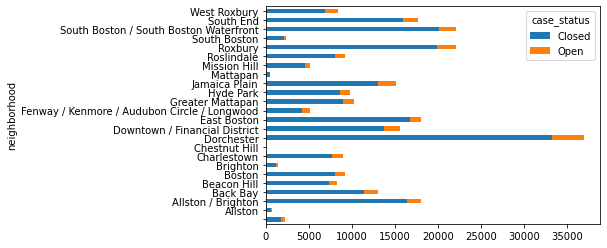

In [4]:
# Bar Chart of Closed vs Open enquiries

BOS311_2022.groupby('neighborhood')['case_status'].value_counts().unstack().plot.barh(stacked=True)

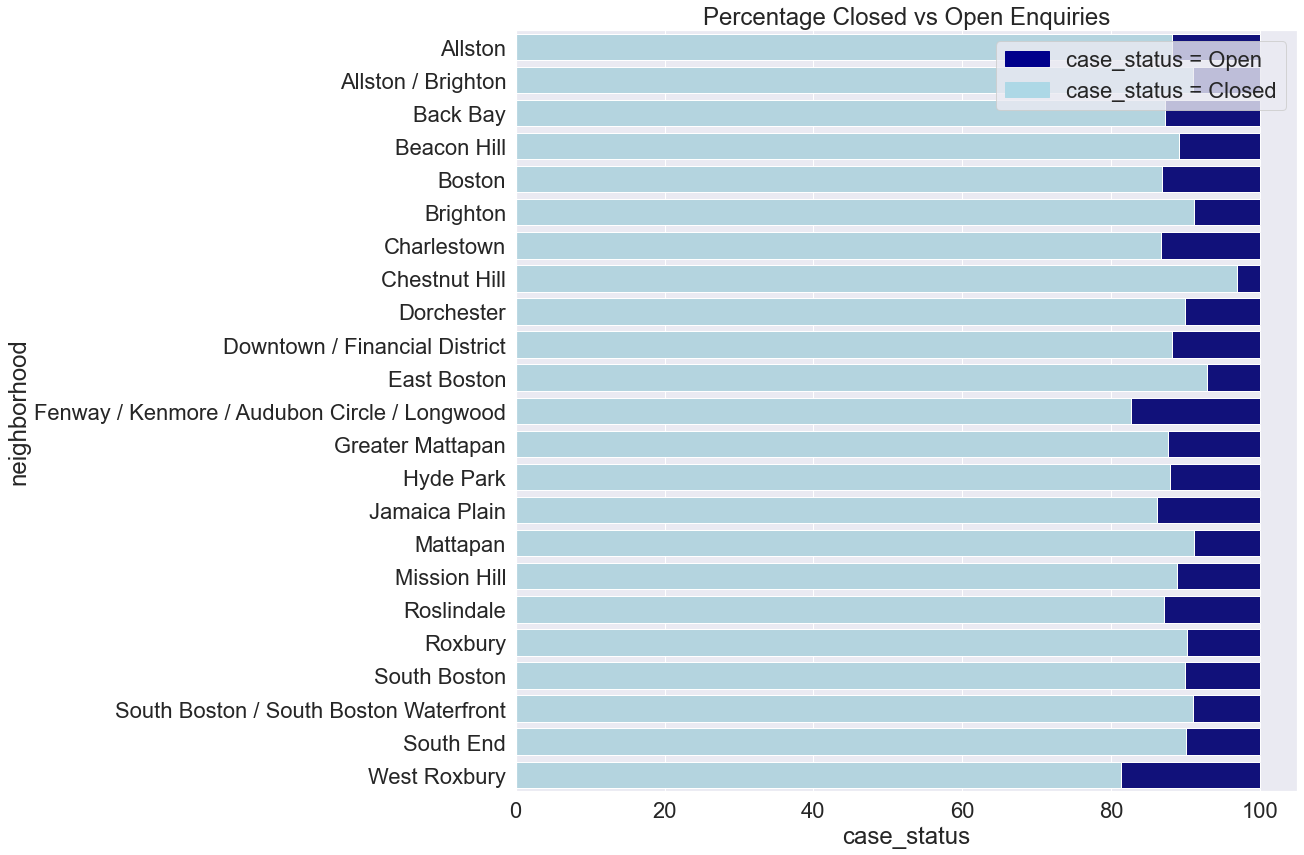

In [5]:
BOS311_2022['neighborhood'].replace(' ', np.nan, inplace=True)
BOS311_2022 = BOS311_2022[BOS311_2022['neighborhood'].notna()]

sns.set(font_scale=2)
# set the figure size
plt.figure(figsize=(14, 14))

# from raw value to percentage
total = BOS311_2022.groupby('neighborhood')['case_status'].count().reset_index()
case = BOS311_2022[BOS311_2022.case_status=='Closed'].groupby('neighborhood')['case_status'].count().reset_index()
case['case_status'] = [i / j * 100 for i,j in zip(case['case_status'], total['case_status'])]
total['case_status'] = [i / j * 100 for i,j in zip(total['case_status'], total['case_status'])]

# bar chart 1 -> top bars (group of 'smoker=No')
bar1 = sns.barplot(y="neighborhood",  x="case_status", data=total, color='darkblue')

# bar chart 2 -> bottom bars (group of 'smoker=Yes')
bar2 = sns.barplot(y="neighborhood", x="case_status", data=case, color='lightblue')

# add legend
top_bar = mpatches.Patch(color='darkblue', label='case_status = Open')
bottom_bar = mpatches.Patch(color='lightblue', label='case_status = Closed')
plt.legend(handles=[top_bar, bottom_bar])
plt.title("Percentage Closed vs Open Enquiries")

# show the graph
plt.show()

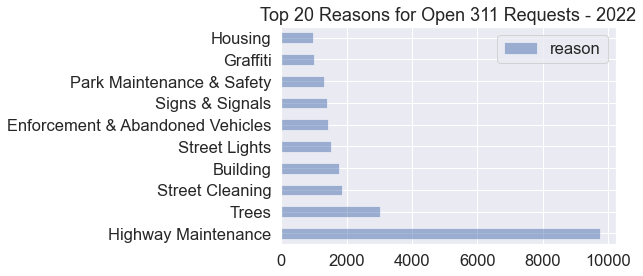

In [6]:
sns.set(font_scale=1.5)

open22 = BOS311_2022.loc[BOS311_2022['case_status'] == "Open"]
open22['reason'].value_counts().nlargest(10).plot(kind='barh', legend=True, alpha=0.5)
plt.title("Top 20 Reasons for Open 311 Requests - 2022")
plt.show()

In [7]:
# Columns to assess/analyze
columns = ['case_enquiry_id', 
           'open_dt', 
           'target_dt', 
           'closed_dt',
           'hours_to_close',
           'year',
           'ontime', 
           'case_status',
           'subject', 
           'reason', 
           'type',
           'neighborhood',
           'enquiries']

def clean(df):
    df = df[df['closed_dt'].notna()]
    df = df[df['open_dt'].notna()]

    #Make Format datetime
    df['closed_dt'] = pd.to_datetime(df.closed_dt)
    df['open_dt'] = pd.to_datetime(df.open_dt)
    df['hours_to_close'] = (df.closed_dt - df.open_dt).astype('timedelta64[h]')
    df['year'] = pd.DatetimeIndex(df['open_dt']).year
    # Make Dummy column for plotting purposes
    df['enquiries'] = 1
    # Reduce Dataset to only desired columns
    df = df[columns]
    df['neighborhood'].replace(' ', np.nan, inplace=True)
    df = df[df['neighborhood'].notna()]
    # Return cleaned dataset
    return df

In [8]:
# Take only needed columns of CLOSED enquiries
BOS311_2022 = clean(BOS311_2022)
BOS311_2021 = clean(BOS311_2021)
BOS311_2020 = clean(BOS311_2020)
BOS311_2019 = clean(BOS311_2019)
BOS311_2018 = clean(BOS311_2018)
BOS311_2017 = clean(BOS311_2017)

#Combine all data 2017-2022
All311 = [BOS311_2022, BOS311_2021, BOS311_2020, BOS311_2019, BOS311_2018, BOS311_2017]
BOS311 = pd.concat(All311, keys=[2022,2021,2020,2019,2018,2017])

In [9]:
# case classification hierarchy (SUBJECT --> REASON --> TYPE)

BOS311['subject'].value_counts()

Public Works Department              763496
Transportation - Traffic Division    362354
Inspectional Services                 86507
Parks & Recreation Department         72500
Mayor's 24 Hour Hotline               58232
Property Management                   17195
Animal Control                        10386
Boston Water & Sewer Commission        3288
Boston Police Department                249
Neighborhood Services                    83
Consumer Affairs & Licensing              5
Disability Department                     1
Name: subject, dtype: int64

In [10]:
BOS311['reason'].value_counts().nlargest(20)

Enforcement & Abandoned Vehicles     288891
Street Cleaning                      199995
Sanitation                           179356
Code Enforcement                     162490
Highway Maintenance                  111946
Signs & Signals                       67280
Recycling                             58895
Street Lights                         45823
Needle Program                        44610
Trees                                 42447
Building                              33866
Park Maintenance & Safety             28620
Housing                               22460
Environmental Services                21313
Graffiti                              17195
Animal Issues                         10386
Administrative & General Requests      8619
Health                                 8472
Abandoned Bicycle                      5683
Notification                           4106
Name: reason, dtype: int64

In [11]:
BOS311['type'].value_counts().nlargest(20)

Parking Enforcement                            264684
Requests for Street Cleaning                   102598
Improper Storage of Trash (Barrels)             80948
Missed Trash/Recycling/Yard Waste/Bulk Item     77687
Schedule a Bulk Item Pickup                     67533
Request for Pothole Repair                      59270
CE Collection                                   58504
Needle Pickup                                   44610
Poor Conditions of Property                     35307
Sign Repair                                     32474
Street Light Outages                            32282
Unshoveled Sidewalk                             31731
Schedule a Bulk Item Pickup SS                  30252
Request for Recycling Cart                      29937
Tree Maintenance Requests                       27792
Pick up Dead Animal                             26470
Traffic Signal Inspection                       25745
Abandoned Vehicles                              24207
Sidewalk Repair (Make Safe) 

## Data Visualizations

Enquiry Hierarchy (SUBJECT --> REASON --> TYPE)

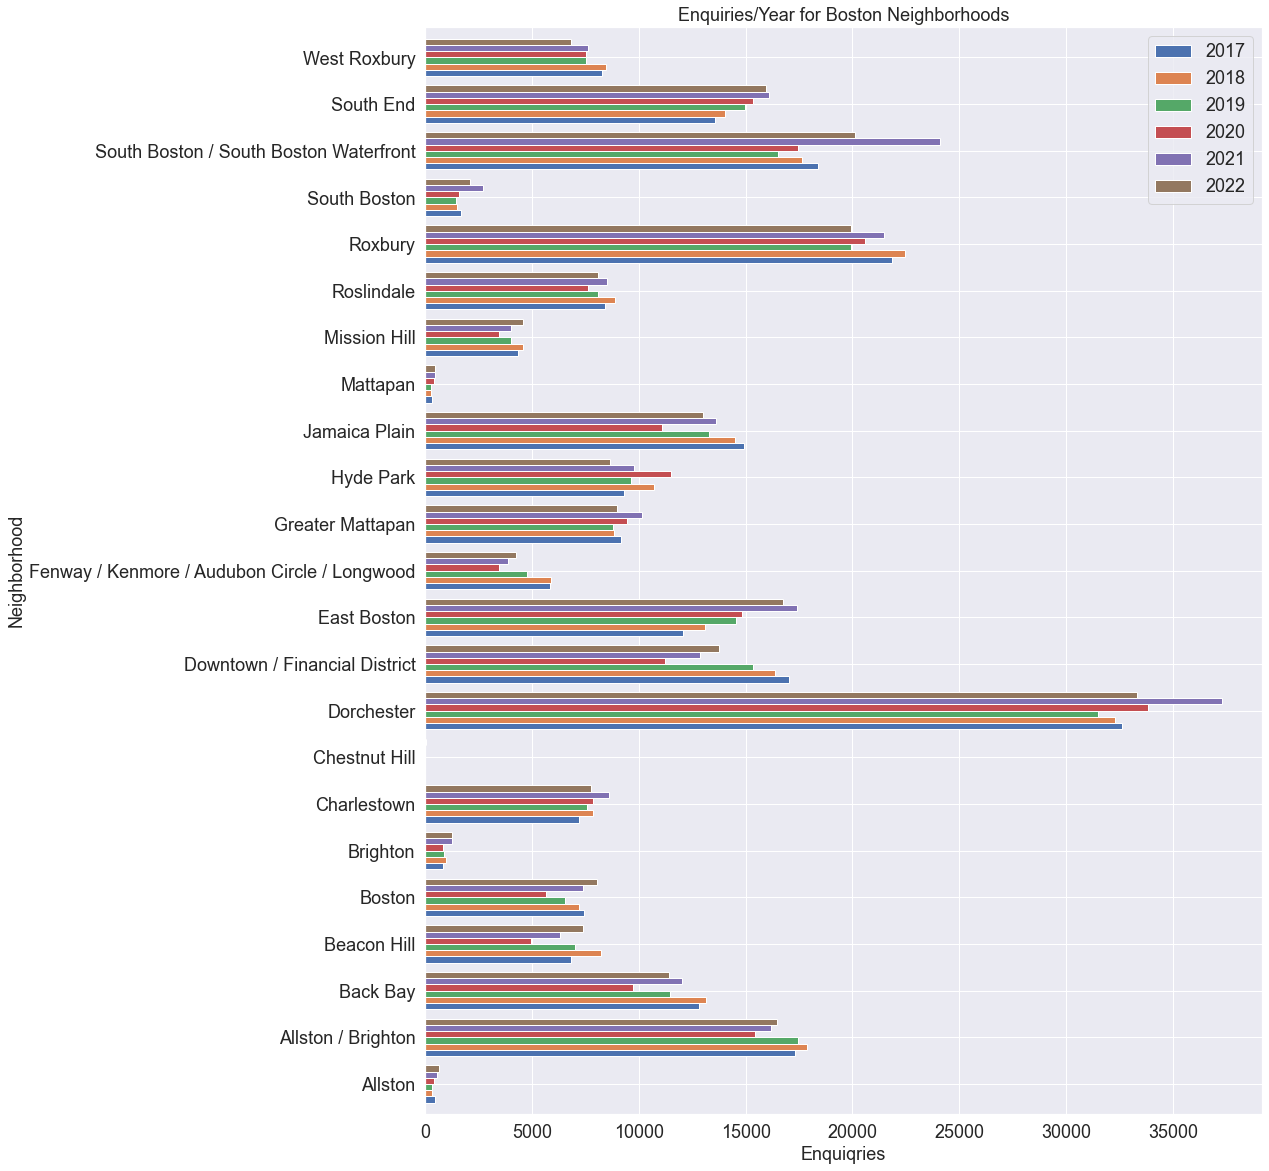

In [12]:
crosstb = pd.crosstab(BOS311['neighborhood'],BOS311['year'])

a = crosstb.plot.barh(stacked=False, 
                      width = 0.80,
                      figsize=(15,20)) #width, height
plt.title('Enquiries/Year for Boston Neighborhoods', size=18)
plt.legend(prop={'size': 18})
plt.ylabel('Neighborhood', size = 18)
plt.xlabel('Enquiqries', size = 18)
plt.xticks(size = 18)
plt.yticks(size = 18)
plt.grid(True)
plt.show()

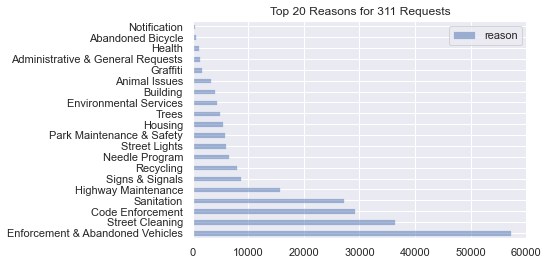

In [13]:
sns.set(font_scale=1)
BOS311_2022['reason'].value_counts().nlargest(20).plot(kind='barh', legend=True, alpha=0.5)
plt.title("Top 20 Reasons for 311 Requests")
plt.show()

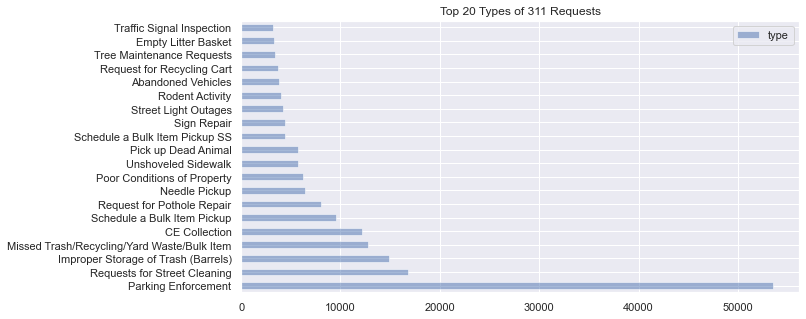

In [40]:
sns.set(font_scale=1)
BOS311_2022['type'].value_counts().nlargest(20).plot(kind='barh', legend=True, alpha=0.5)
plt.title("Top 20 Types of 311 Requests")
plt.show()

In [14]:
# sns proportion histplot

def histPlot(df, xaxis, yaxis):
    sns.set(rc={'figure.figsize':(8,11)})
    sns.set(font_scale=2)
    snsplot = sns.histplot(
        data=df,
        y=yaxis, hue=xaxis,
        multiple="fill", stat="proportion",
        discrete=True, #, shrink=.8,
    )
    sns.move_legend(snsplot, "upper left", bbox_to_anchor=(1, 1))
    
    return snsplot  

<AxesSubplot:xlabel='Proportion', ylabel='neighborhood'>

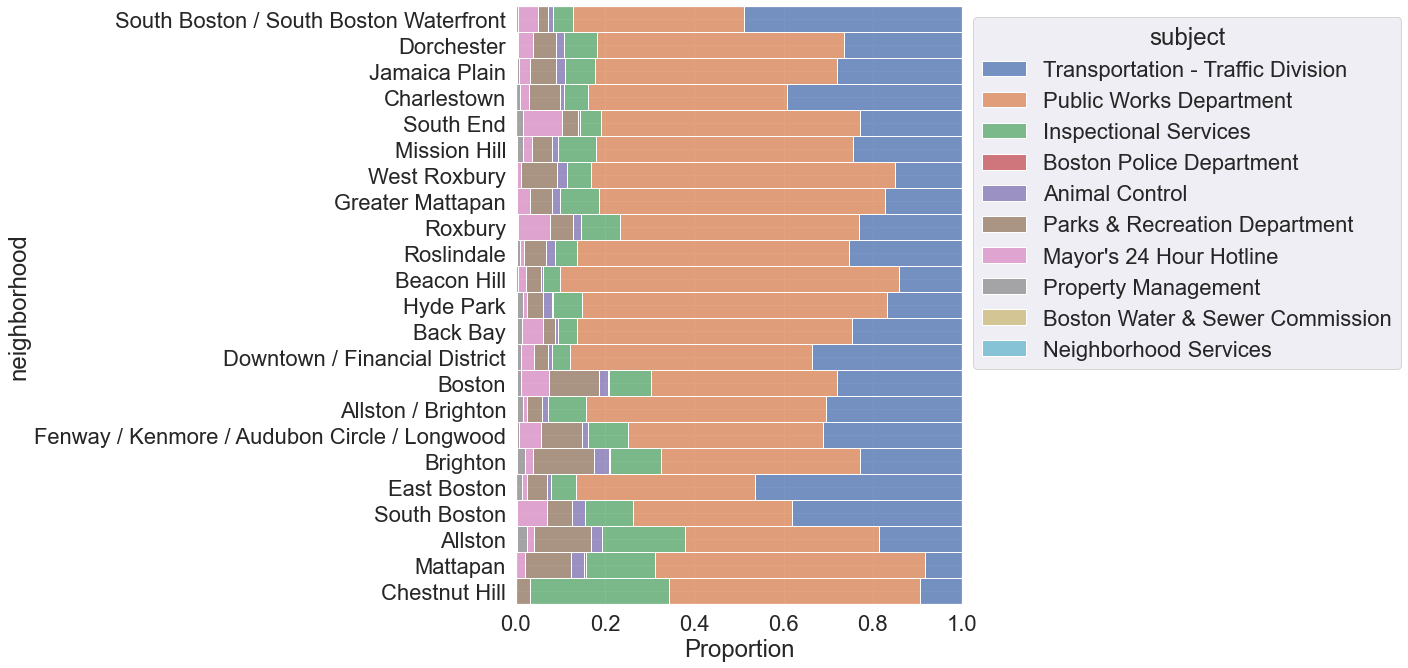

In [15]:
# 2022 Subject Breakdown by neighborhood

yaxis = "neighborhood"
xaxis = "subject"
histPlot(BOS311_2022, xaxis, yaxis)
# plt.savefig('BOS311-2022_Subject_Breakdown.png')

In [16]:
# sns Average barplot

def avgBarPlot(df, xaxis, yaxis):
    sns.set(font_scale=1.5)
    plot_order = df.groupby(yaxis)[xaxis].mean().sort_values(ascending=False).index.values
    snsplot = sns.catplot(data = df,
                         x = xaxis,
                         y = yaxis,
                         kind = 'bar',
                         ci=None, legend_out=False, order=plot_order,
                         height=8.27, aspect=11.7/8.27, palette = "Spectral")    
    return snsplot

def autolabel(rects, fmt='.1f'):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        width = rect.get_width()
        rect.axes.annotate(f'{{:{fmt}}}'.format(width),
                           xy=(rect.get_x() + width, rect.get_y() + height),
                           xytext=(0, 3), textcoords='offset points')

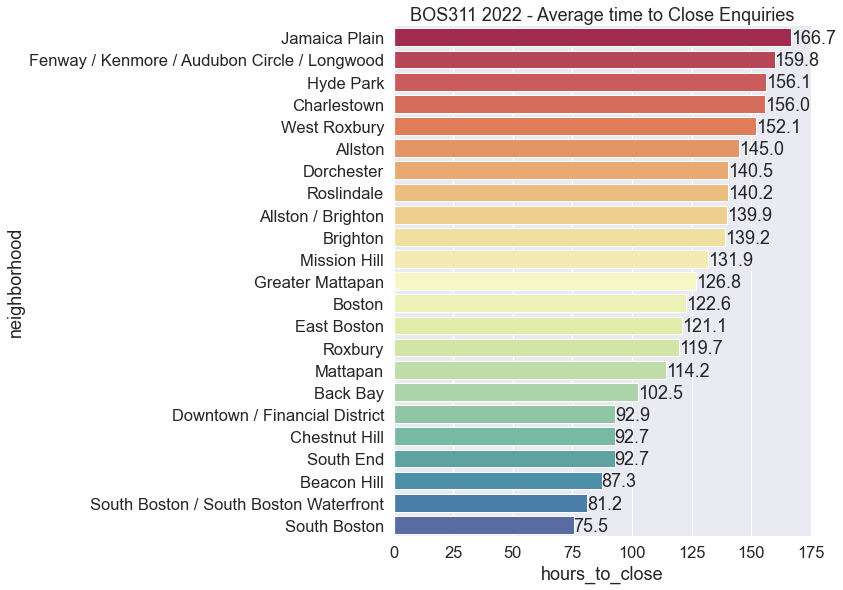

In [17]:
xaxis = 'hours_to_close'
yaxis = 'neighborhood'

hrs_Close2022 = avgBarPlot(BOS311_2022, xaxis, yaxis)
hrs_Close2022.set(title='BOS311 2022 - Average time to Close Enquiries')
autolabel(hrs_Close2022.ax.patches)

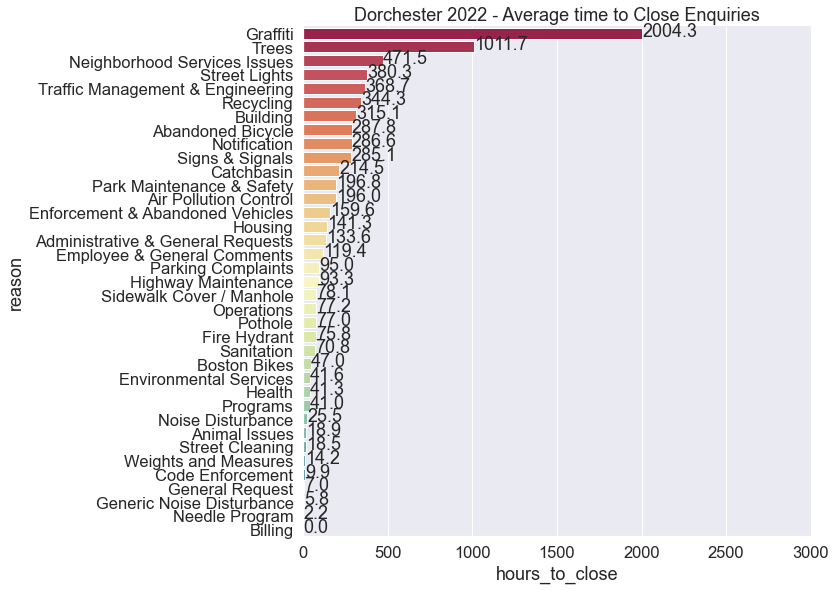

In [18]:
xaxis = 'hours_to_close'
yaxis = 'reason'

DC_hrs_Close2022 = avgBarPlot(BOS311_2022.loc[BOS311_2022['neighborhood'] == "Dorchester"], xaxis, yaxis)
DC_hrs_Close2022.set(title='Dorchester 2022 - Average time to Close Enquiries')
DC_hrs_Close2022.set(xlim=(0, 3000))
autolabel(DC_hrs_Close2022.ax.patches)

## Public Works Enquiries Only

In [19]:
# Assessing only public works

pw_22 = BOS311_2022.loc[BOS311_2022['subject'] == "Public Works Department"]
pw_21 = BOS311_2021.loc[BOS311_2021['subject'] == "Public Works Department"]
pw_20 = BOS311_2020.loc[BOS311_2020['subject'] == "Public Works Department"]
pw_19 = BOS311_2019.loc[BOS311_2019['subject'] == "Public Works Department"]
pw_18 = BOS311_2018.loc[BOS311_2018['subject'] == "Public Works Department"]
pw_17 = BOS311_2017.loc[BOS311_2017['subject'] == "Public Works Department"]

In [20]:
# pw_22['type'].value_counts().nlargest(10)

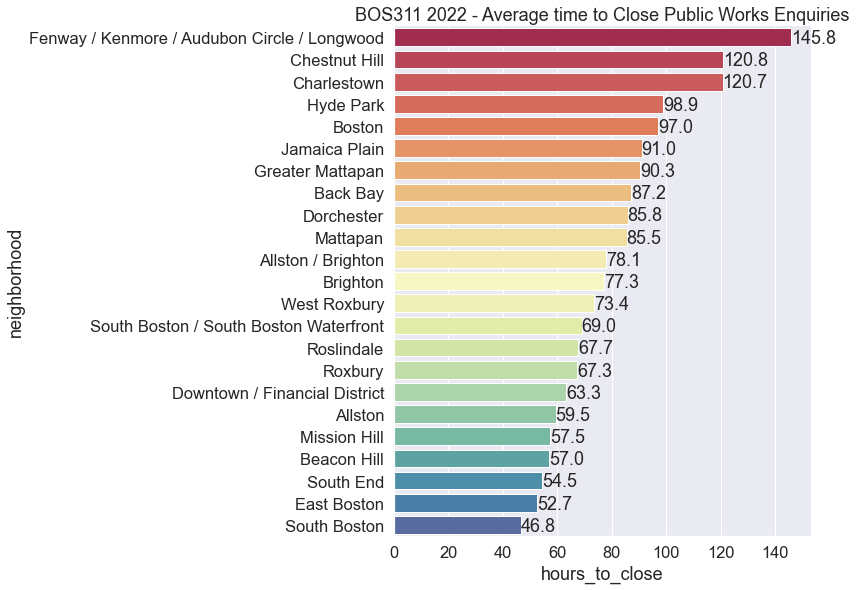

In [21]:
xaxis = 'hours_to_close'
yaxis = 'neighborhood'

All_PWs_Close2022 = avgBarPlot(pw_22, xaxis, yaxis)
All_PWs_Close2022.set(title='BOS311 2022 - Average time to Close Public Works Enquiries')
autolabel(All_PWs_Close2022.ax.patches)

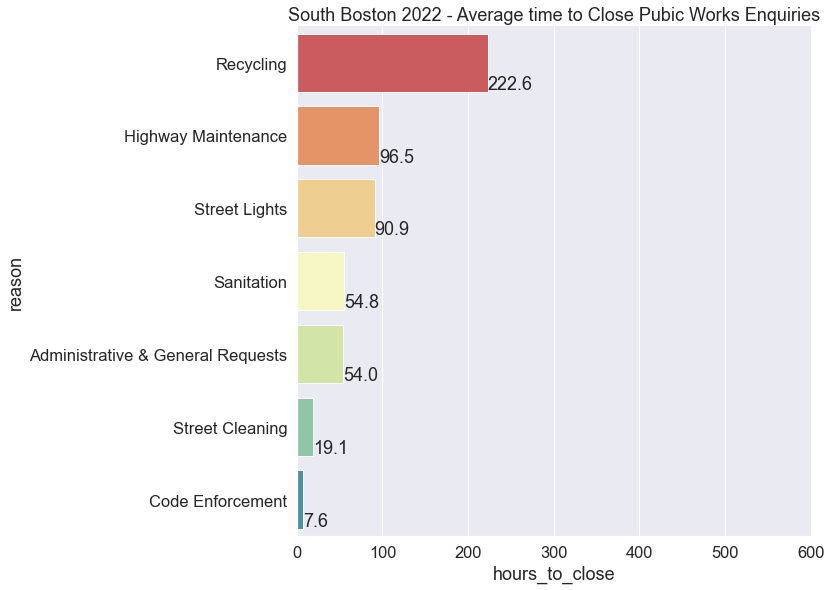

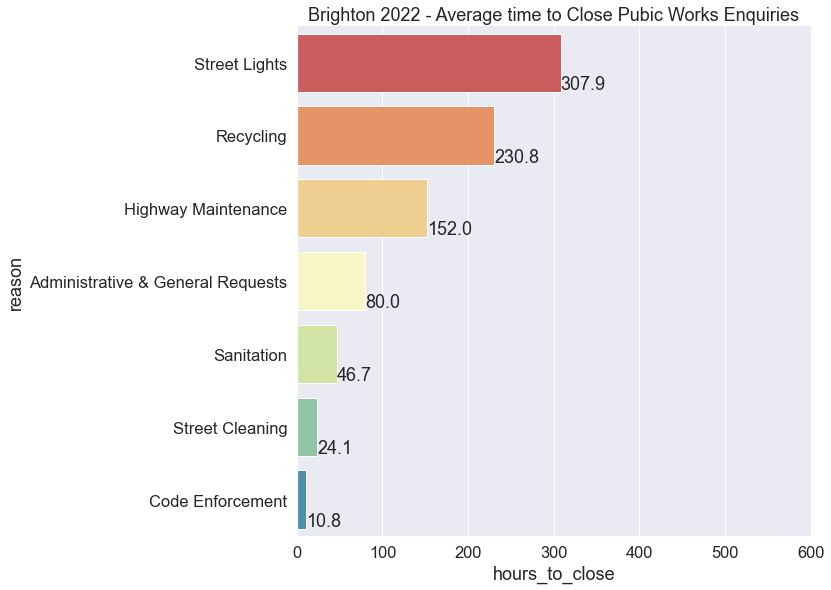

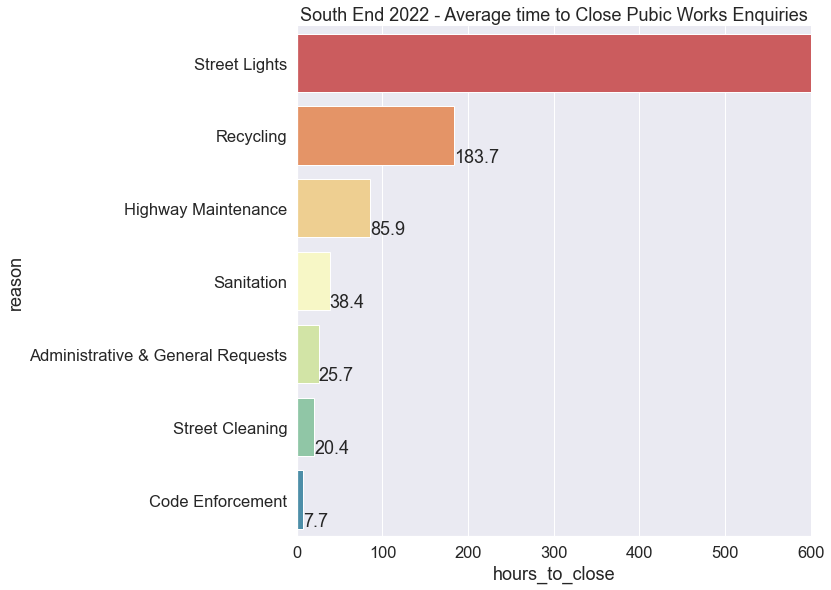

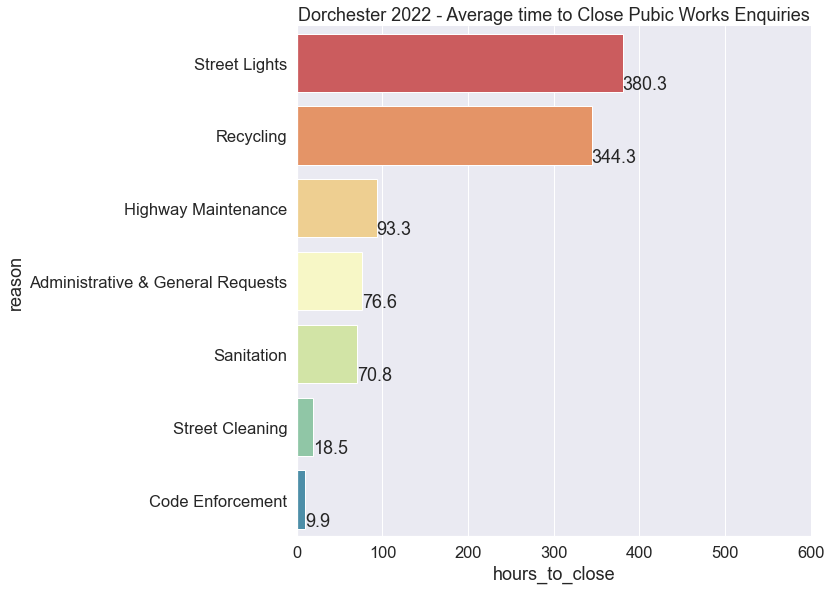

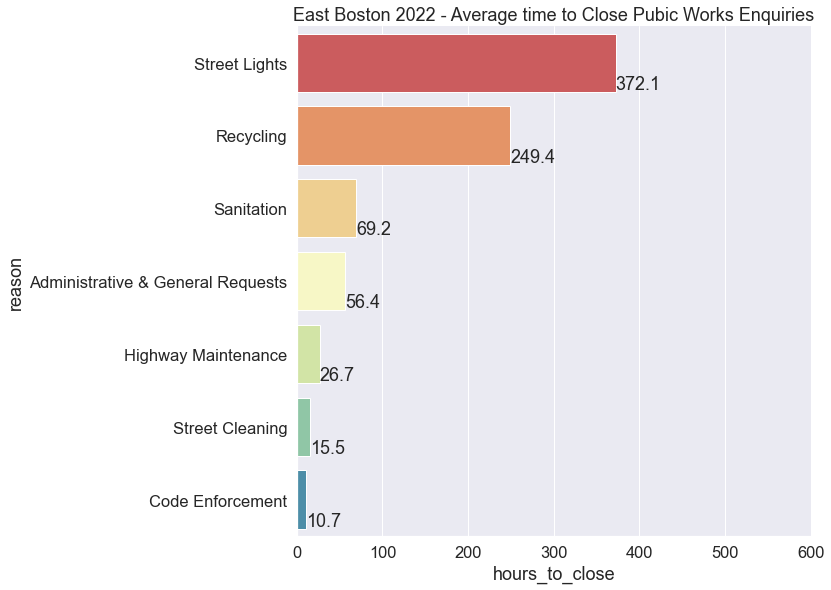

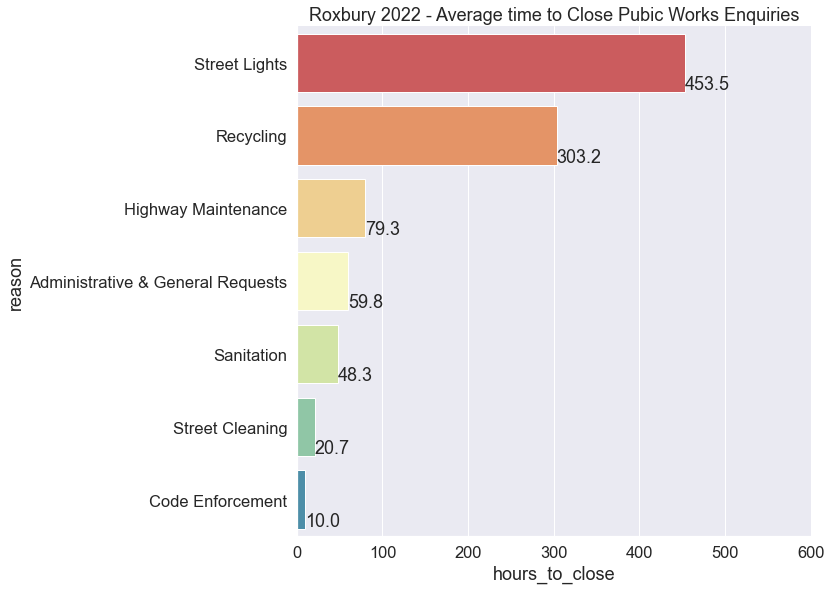

In [22]:
# This was used to create the 6 plots shown in the final report
xaxis = 'hours_to_close'
yaxis = 'reason'
neighborhoods = ["South Boston", "Brighton", "South End",
                 "Dorchester", "East Boston", "Roxbury"]

for neigh in neighborhoods:
    PWs_Close22 = avgBarPlot(pw_22.loc[pw_22['neighborhood'] == neigh], xaxis, yaxis)
    PWs_Close22.set(title= neigh + ' 2022 - Average time to Close Pubic Works Enquiries')
    PWs_Close22.set(xlim=(0, 600))
    autolabel(PWs_Close22.ax.patches)

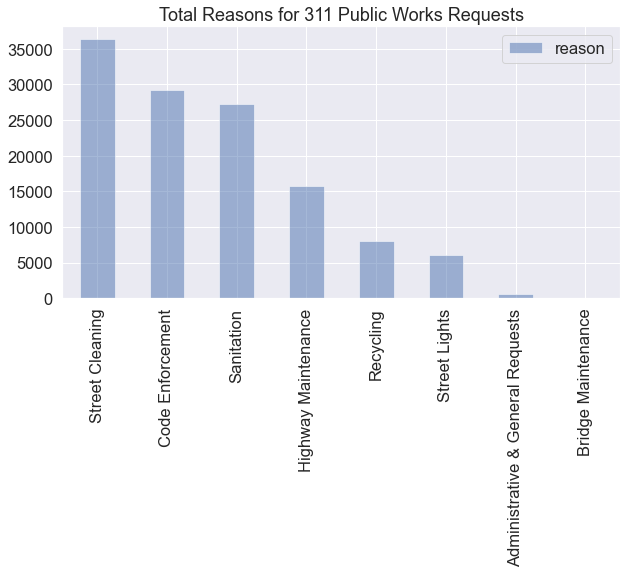

In [28]:
sns.set(rc={"figure.figsize":(10, 5)})
sns.set(font_scale=1.5)
pw_22['reason'].value_counts().plot(kind='bar', legend=True, alpha=0.5)
plt.title("Total Reasons for 311 Public Works Requests")
plt.show()

In [37]:
testing = pd.DataFrame(pw_22.groupby(['neighborhood', 'reason'])['hours_to_close'].mean())
neighborhoods = pw_22['neighborhood'].unique().tolist()

print(testing.shape)
testing.head(50)

(161, 1)


hours_to_close
neighborhood       reason                                           
Allston            Administrative & General Requests       50.000000
                   Code Enforcement                        12.970000
                   Highway Maintenance                    256.973684
                   Recycling                              232.750000
                   Sanitation                              61.680000
                   Street Cleaning                         12.495050
                   Street Lights                          104.700000
Allston / Brighton Administrative & General Requests      170.966667
                   Code Enforcement                         9.895763
                   Highway Maintenance                    162.757752
                   Recycling                              260.596639
                   Sanitation                              78.615385
                   Street Cleaning                         18.208744
                   Street Lights                          366.454545
Back Bay           Administrative & General Requests       38.192308
                   Code Enforcement                         8.275949
                   Highway Maintenance                    105.368166
                   Recycling                              254.500000
                   Sanitation                              55.351301
                   Street Cleaning                         30.881877
                   Street Lights                          640.502994
Beacon Hill        Administrative & General Requests       47.090909
                   Bridge Maintenance                      15.000000
                   Code Enforcement                         7.486008
                   Highway Maintenance                    172.473373
                   Recycling                              110.368421
                   Sanitation                              36.527322
                   Street Cleaning                         13.939792
                   Street Lights                          440.274869
Boston             Administrative & General Requests      102.291667
                   Code Enforcement                        13.883721
                   Highway Maintenance                    113.195355
                   Recycling                              179.181818
                   Sanitation                              36.473684
                   Street Cleaning                         42.721798
                   Street Lights                          626.141221
Brighton           Administrative & General Requests       80.000000
                   Code Enforcement                        10.818182
                   Highway Maintenance                    151.989899
                   Recycling                              230.785714
                   Sanitation                              46.688172
                   Street Cleaning                         24.051948
                   Street Lights                          307.931034
Charlestown        Administrative & General Requests       64.611111
                   Code Enforcement                        11.427995
                   Highway Maintenance                    123.782077
                   Recycling                              236.199115
                   Sanitation                              73.875244
                   Street Cleaning                         21.303511
                   Street Lights                          408.411765

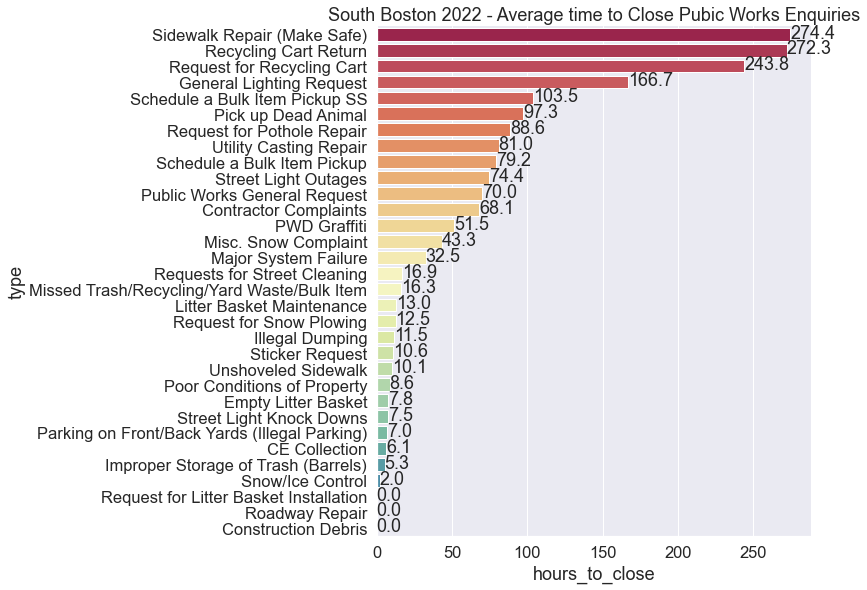

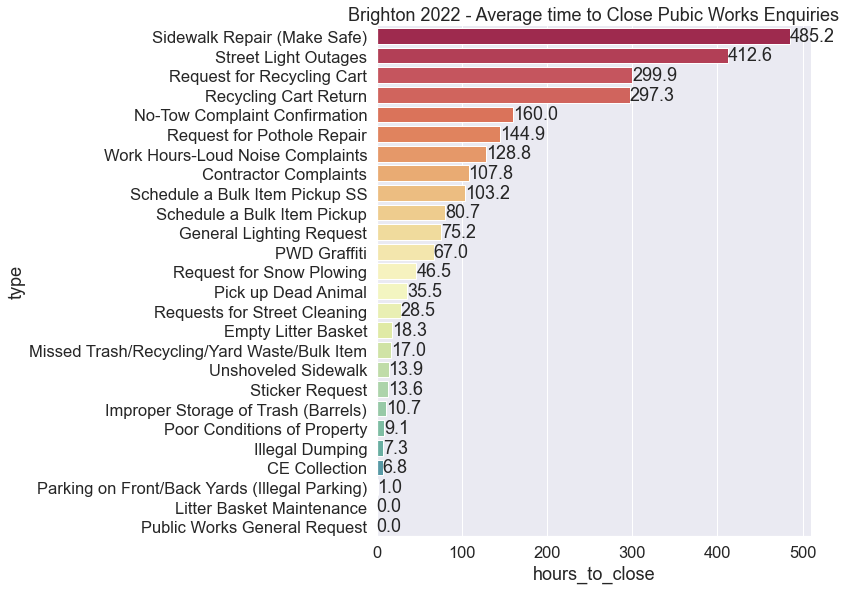

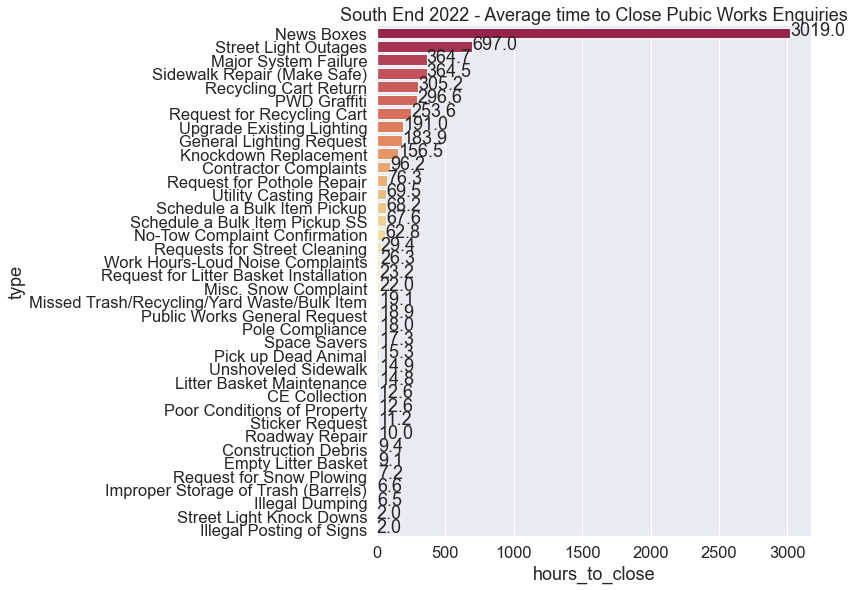

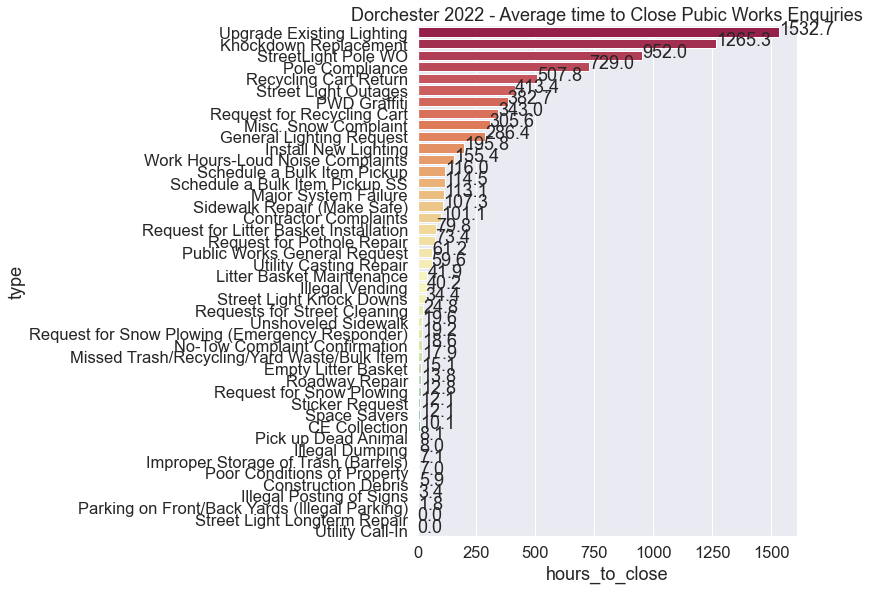

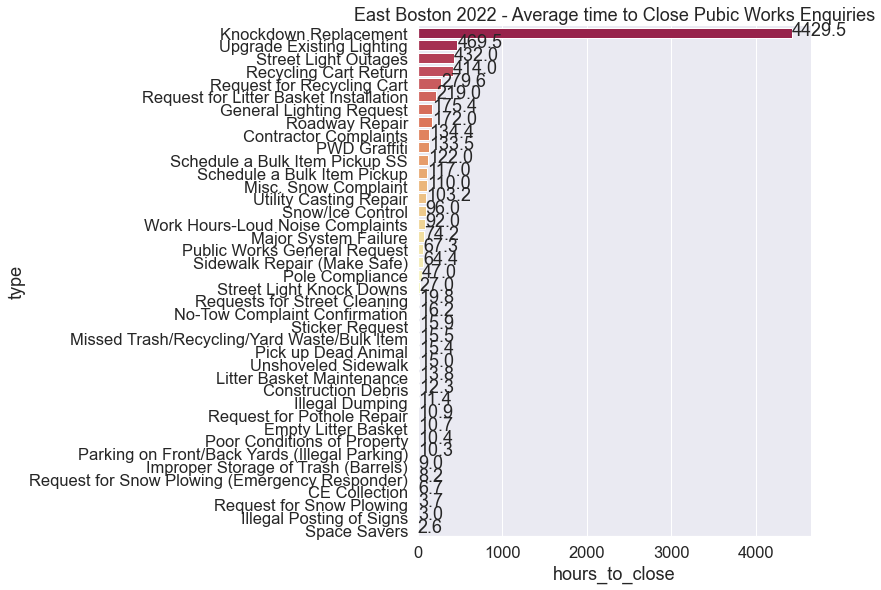

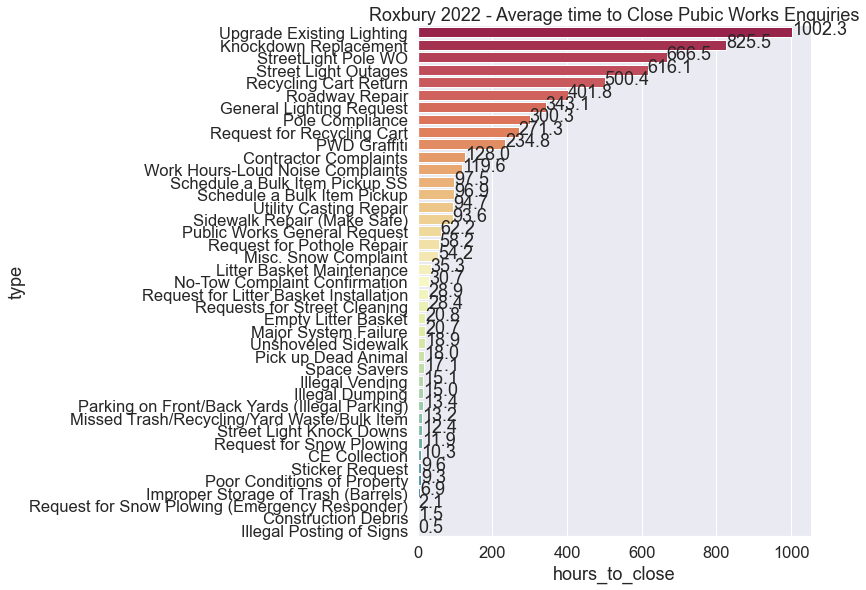

In [44]:
# This was used to create the 6 plots shown in the final report
xaxis = 'hours_to_close'
yaxis = 'type'
neighborhoods = ["South Boston", "Brighton", "South End",
                 "Dorchester", "East Boston", "Roxbury"]
sns.set(font_scale=1)
for neigh in neighborhoods:
    PWs_Close22 = avgBarPlot(pw_22.loc[pw_22['neighborhood'] == neigh], xaxis, yaxis)
    PWs_Close22.set(title= neigh + ' 2022 - Average time to Close Pubic Works Enquiries')
#     PWs_Close22.set(xlim=(0, 1000))
    autolabel(PWs_Close22.ax.patches)